# Micro-Credit Defaulter Project

### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


#### Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

#### Importing necessary Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df = pd.read_csv("Data file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Above dataset contains 209593 rows and 37 columns.Our label column that stores the defaulter and non deafulter values marked with 0 and 1 making this a Classification problem.

In [3]:
# To display maximum rows and columns in the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

## Exploratory Data Analysis (EDA)

In [4]:
# Checking the column names in the dataset
print("Columns present in our dataset:\n",df.columns)

Columns present in our dataset:
 Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')


In [5]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

Dataset has 3 object type column, 13 integer and 21 float type column.We can drop the column Unnamed as it is simply storing index data. Count is same for all column so no null values.

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# Checking for null values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

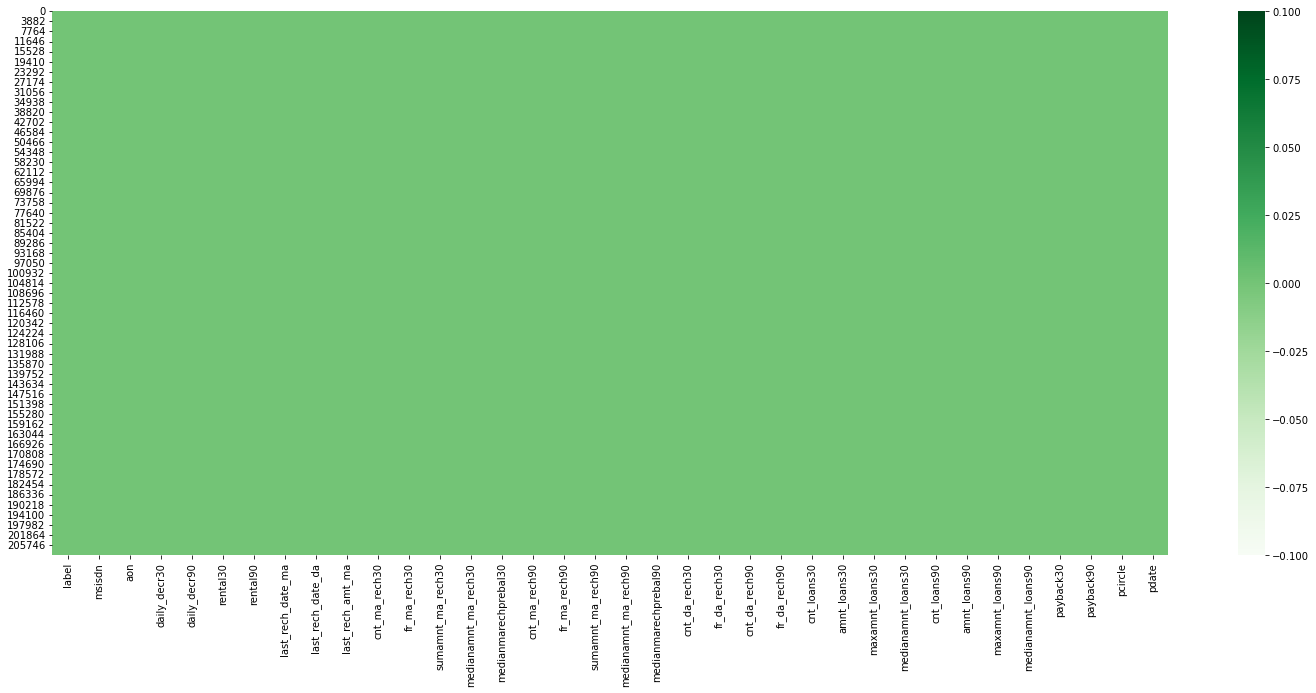

In [12]:
# Let's visualize the null values clearly through Heatmap
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(), cmap="Greens")

In [8]:
# Checking number of unique values in each column of dataset
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
pcircle,1
label,2
maxamnt_loans90,3
medianamnt_loans90,6
medianamnt_loans30,6
cnt_da_rech90,27
cnt_loans30,40
fr_da_rech90,46
amnt_loans30,48
amnt_loans90,69


From above we can notice that column 'pcircle' has only 1 unique values and column 'msisdn' contains mobile no of users. These two column will not contribute much on predicting and we can drop these columns.

In [4]:
# Dropping irrelevant columns
df.drop(columns = ['pcircle', 'msisdn'] , inplace = True )

##### Checking the Zero values

In [10]:
Zero_value = pd.DataFrame(df.isin([0]).sum().sort_values(ascending=False))
Zero_value.columns=['Count of Zero values']
Zero_value['% of Zero values']=Zero_value['Count of Zero values']/2095.93    # 209593/100 = 2095.93
Zero_value

,Count of Zero values,% of Zero values
fr_da_rech90,208728,99.587295
fr_da_rech30,208014,99.246635
cnt_da_rech30,205479,98.037148
cnt_da_rech90,204226,97.439323
last_rech_date_da,202861,96.788061
medianamnt_loans90,197424,94.193985
medianamnt_loans30,195445,93.249775
payback30,106712,50.913914
payback90,95699,45.659445
fr_ma_rech30,78683,37.540853


From above zero values percentage, we can observe the features like ‘fr_da_rech90’, ‘fr_da_rech30’, ‘cnt_da_rech30’, ‘cnt_da_rech90’, ‘last_rech_date_da’, ‘medianamnt_loans90’, ‘medianamnt_loans30’ having zero values more than 90% which are not required for the predictions so dropping these columns.

In [5]:
# Dropping columns having more than 90% of zero values
df.drop(columns=["fr_da_rech90","fr_da_rech30","cnt_da_rech30","cnt_da_rech90","last_rech_date_da","medianamnt_loans90","medianamnt_loans30"],axis=1,inplace=True)

In [6]:
# Let's change the Date dtype to datetime series

df['pdate']=pd.to_datetime(df['pdate'])

#Extracting paid year,month and day from pdate

#Extracting year
df["Year"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

#Extracting month
df["Month"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

#Extracting day
df["Day"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [7]:
# Dropping pdate column after separating day, month and year from it
df.drop("pdate",axis=1,inplace=True)

We have successfully extracted day, month and year from pdate column and dropped pdate feature after extraction.

In [14]:
# Statistical summary of dataset
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Year,Month,Day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,2016.0,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.0,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,2016.0,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,2016.0,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,2016.0,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,2016.0,8.000000,31.00000


From above statistical summery of the dataset, we can see many feature has negative values.Column 'Year has only 1 value which is 2016, so we can drop this column. Most of the features, mean value is greater than mediun, menas data is skewed towards right.

In [8]:
# Dropping Year column 
df.drop("Year",axis=1,inplace=True)

## Data Visualization

##### Univariate Analysis

In [16]:
Rows = df.shape[0]
Non_Defaulter = df[df["label"] == 1].shape[0]
Defaulter = df[df["label"] == 0].shape[0]
print("Total records = ",Rows)
print("Non_Defaulter = ",Non_Defaulter)
print("Defaulter     = ",Defaulter)

Total records =  209593
Non_Defaulter =  183431
Defaulter     =  26162


1    183431
0     26162
Name: label, dtype: int64


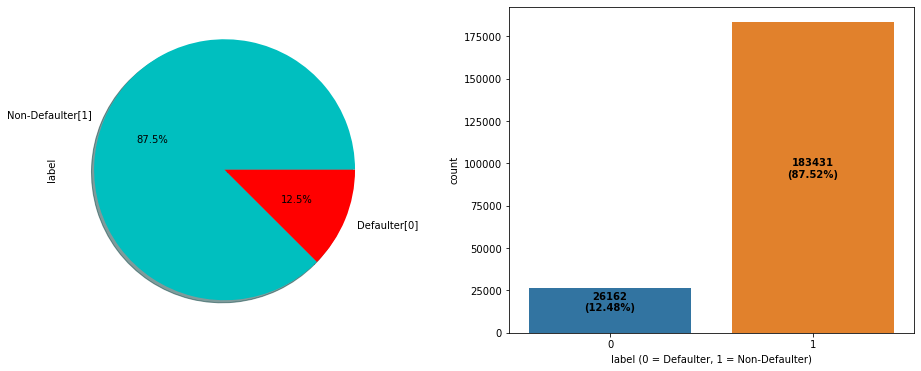

In [17]:
# Visualizing label whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
print(df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(16,6))
labels = ['Non-Defaulter[1]', 'Defaulter[0]']
colors = ["c", "red"]
df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors)
ax = sns.countplot('label', data=df, ax=ax[1],linewidth=2.3)
index = 0
for i in ax.patches:
    height = round(i.get_height(),2)
    total = len(df["aon"])
    percentage = f"{height}\n({round(height*100/total,2)}%)"
    plt.text(index,height/2,percentage,ha="center",fontweight="bold")
    index += 1
plt.xlabel('label (0 = Defaulter, 1 = Non-Defaulter)')
plt.show()

From the above plots we can observe around 87.5% of the loan has been paid by the user and only 12.5% of the loan failed to pay. Also the dataset is highly imbalanced, so we need to work on that or else our model will be more biased towards success and make false interpretation.

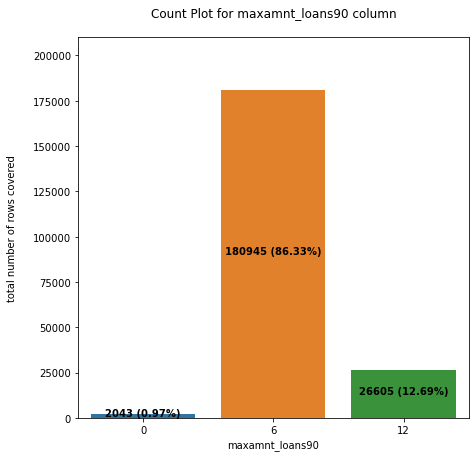

In [18]:
try:
    x = 'maxamnt_loans90'
    k=0
    plt.figure(figsize=[7,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,210000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

##### Bivariate Analysis

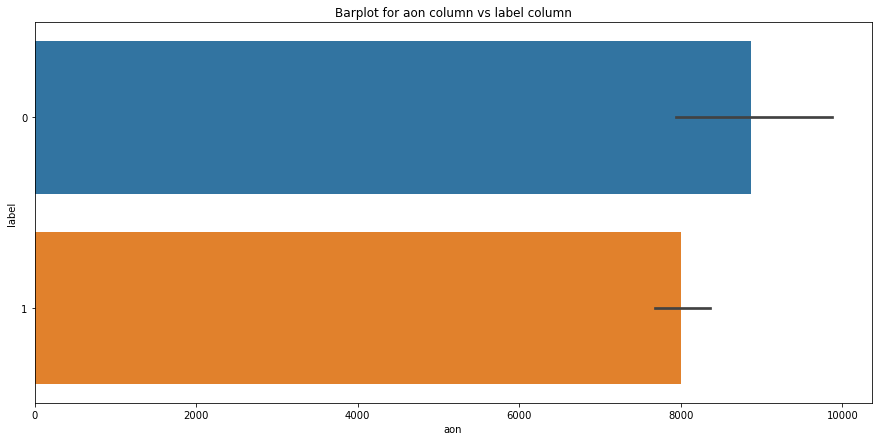

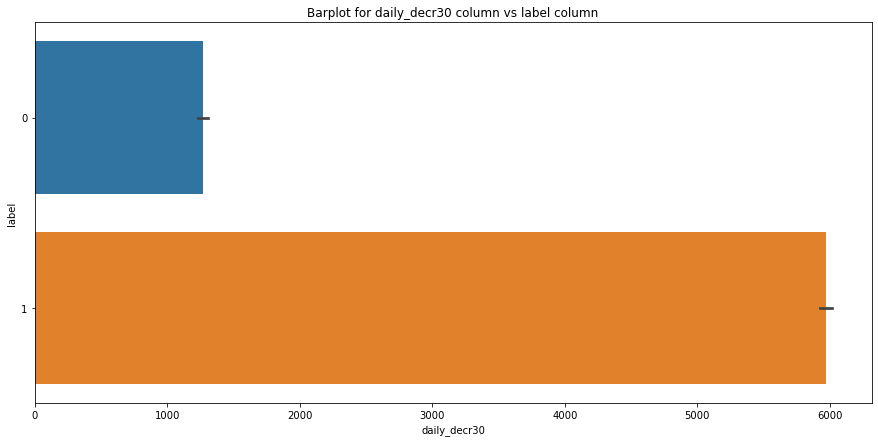

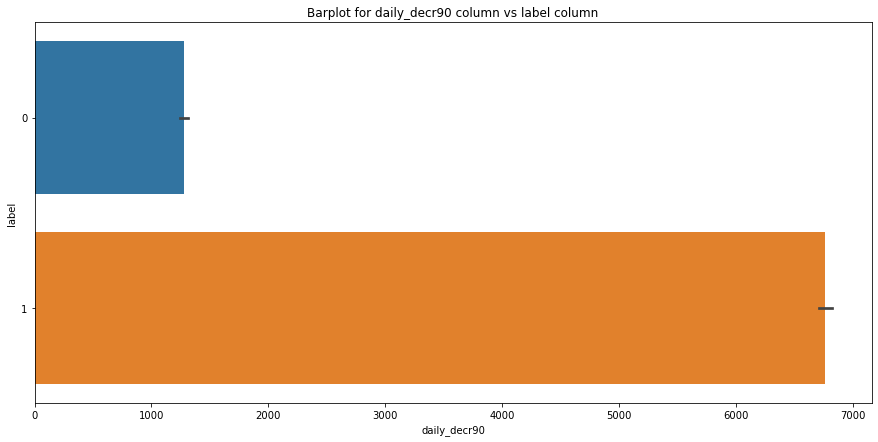

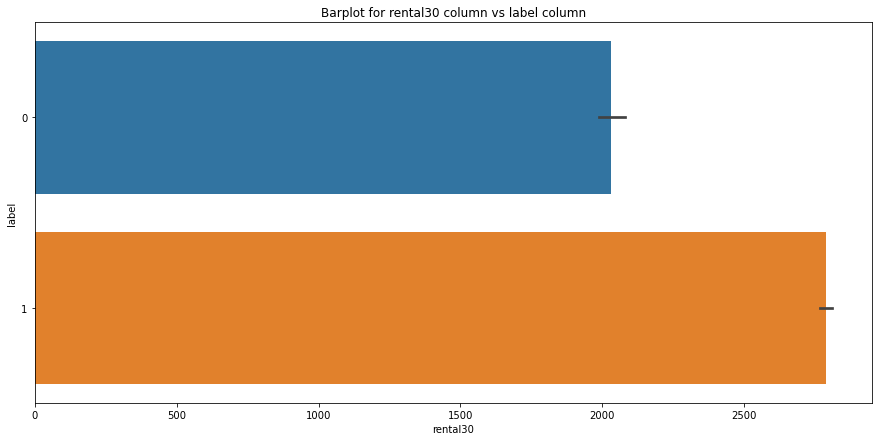

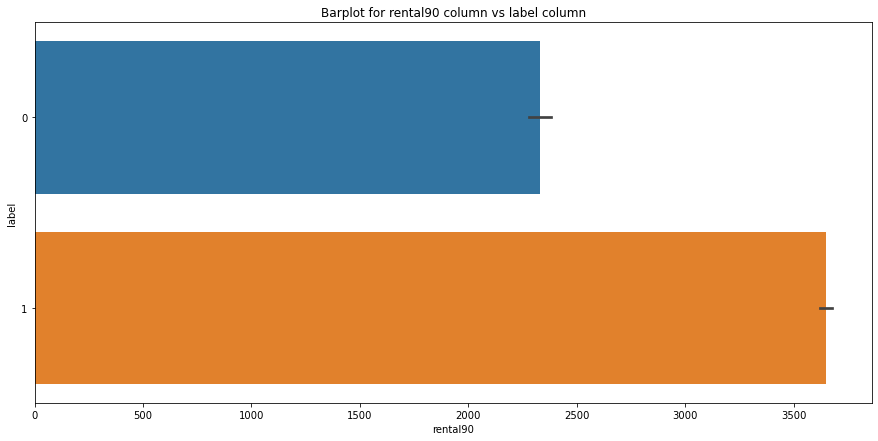

In [19]:
y = 'label'
x = 'aon'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'daily_decr30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'daily_decr90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'rental30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'rental90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

From the above bar plot we can observe that the defaulter rate is higher where the user age on cellular network in days is high.

Most of the users who have paid back the credit amount within 5 days of issuing loan, they have high rate of daily amount spent from the account over last 30 days and 90 days

The users who have spent daily amount from main account over last 30 days and 90 days have always paid back the loan amount within 5 days

Non defaulter users have average main account balance over last 30 days and 90 days

That means the users who have average main account balance always pays back the credit amounts within 5 days. And around 1% of the users either failed to payback the loan amount within the due date or they are not paying the loan.

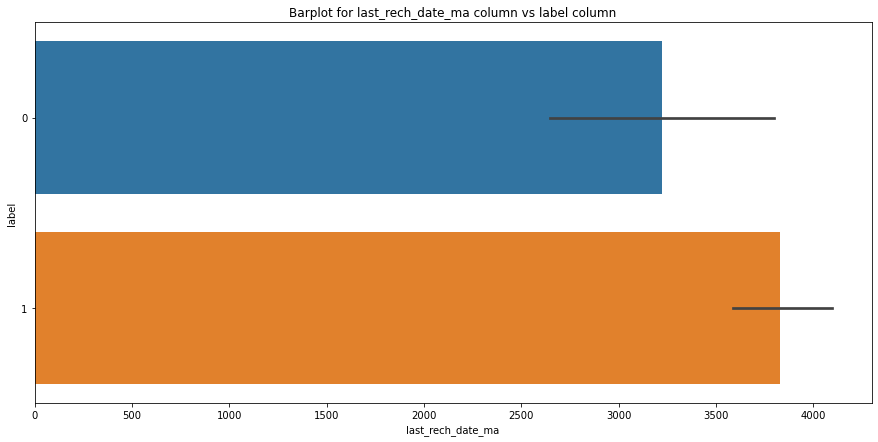

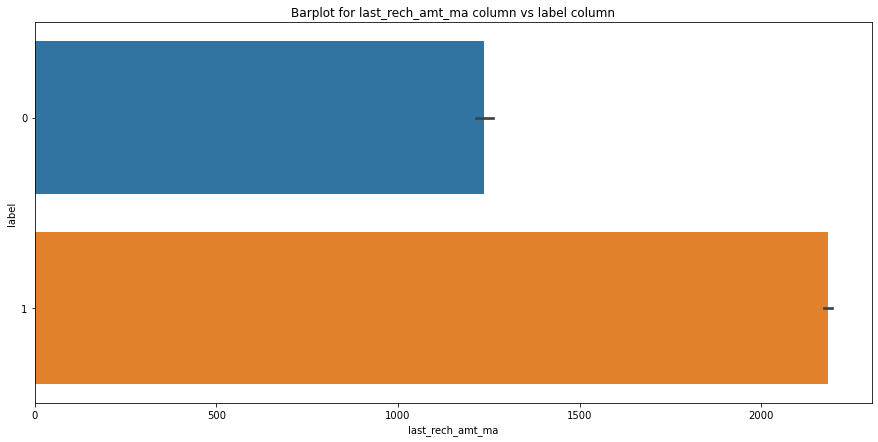

In [20]:
y = 'label'

x = 'last_rech_date_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'last_rech_amt_ma'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The users who have recharged their main account on time are most likely to pay back their loan amount within 5 days. Also some of the users who have not paid back their loan within 5 days they also recharged their main account on time

Looking at above plot of last_rech_amt_ma, we can say that if the amount of last recharge of main account is around 2000 then a greater number of people will pay back the loan amount.

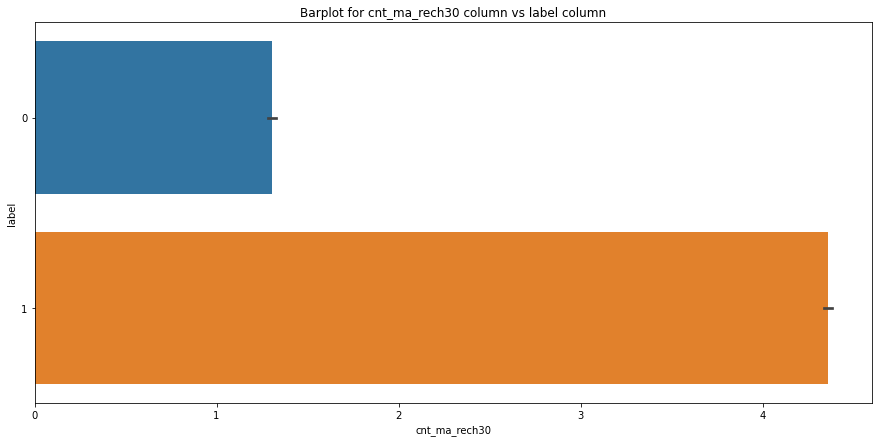

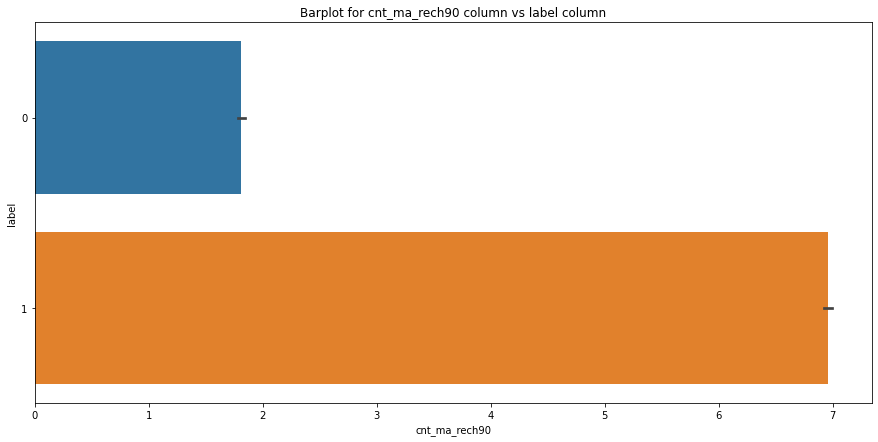

In [21]:
y = 'label'

x = 'cnt_ma_rech30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'cnt_ma_rech90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The users who have paid back their loan within 5 days have got recharged their main account upto 7 times in last 90 days and the users who have not been paid loan within due date, they have got recharged their main account twice in last 90 days.

From both the plots we can say that the users who got recharged their main account maximum times, they are able to pay back their loan amount within 5 days compared to the users who got their main account recharged less than 2 times.

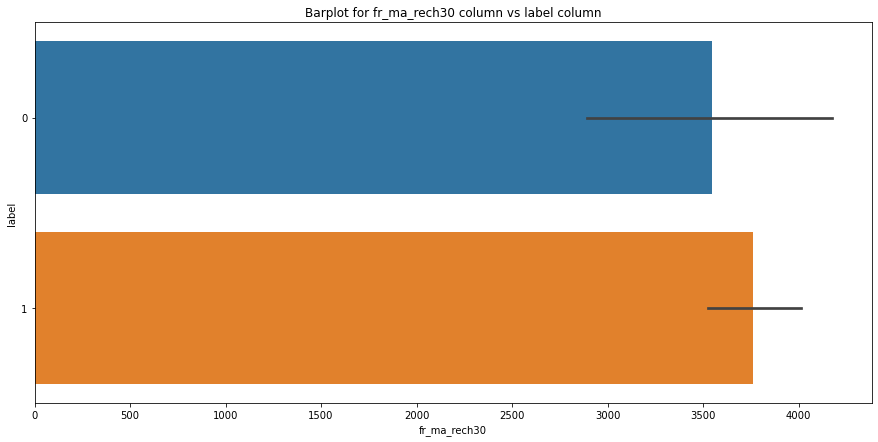

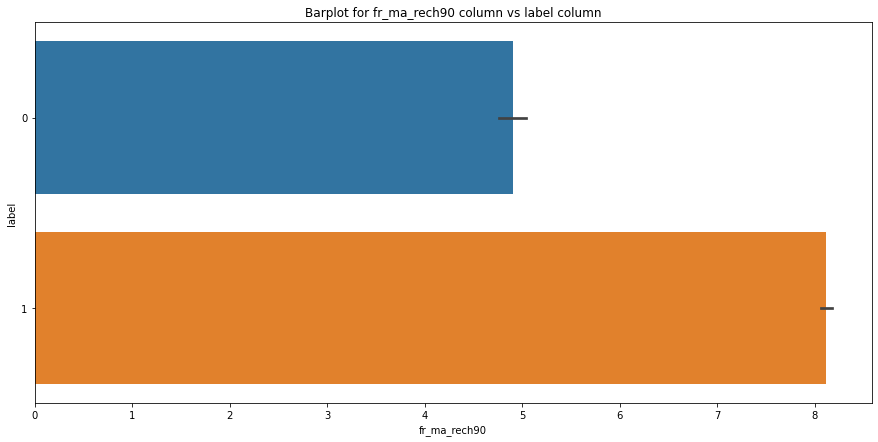

In [22]:
y = 'label'

x = 'fr_ma_rech30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'fr_ma_rech90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The count of defaulters and non-defaulters is almost similar for the frequency of main account recharged in last 30 days. They didn't pay back the loan within 5 days. Which means there it is not contributing more for prediction

The frequency of main account recharged in last 90 days is increased for non-defaulters compared to defaulters.

From the frequency of main account recharged in last 30 days & 90 days we have seen the users with low frequency are causing huge losses, company should implement some kind of strategies to reduce that like send SMS alerts for notification.

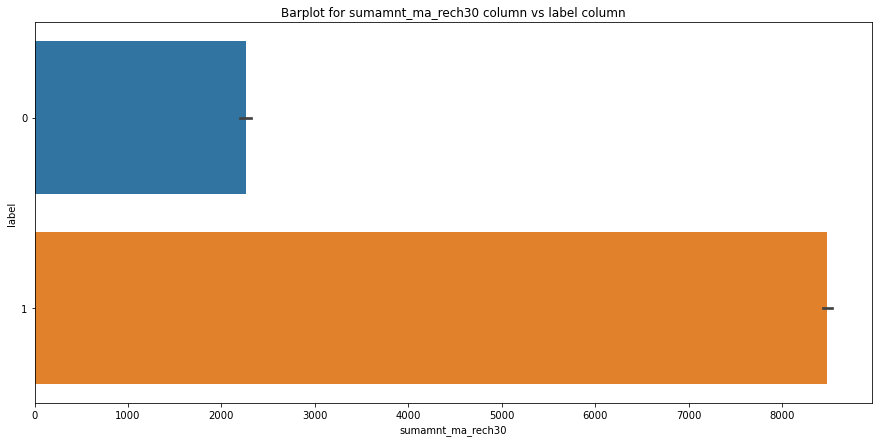

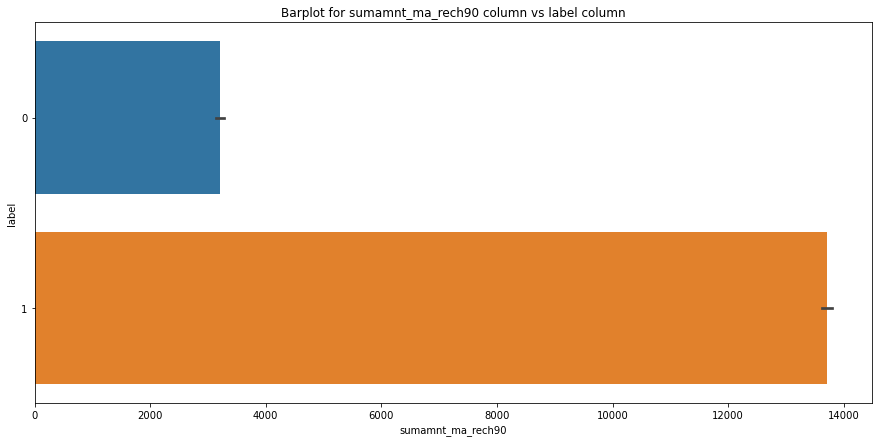

In [23]:
y = 'label'

x = 'sumamnt_ma_rech30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'sumamnt_ma_rech90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The users who failed to pay back the loan within 5 days have less amount of recharge in their main account over last 30 days which is around 2000-2400 (in Indonesian Rupiah). And the users who paid back their loan within 5 days, they are recharging their main account more than 8000 (in Indonesian Rupiah) in last 30 days.

The users who have paid their loan amount within 5 days have the total amount of recharge in their main account around 13700 (Indonesian Rupiah) in last 90 days while the defaulters have their total amount of recharge around 3500 (Indonesian Rupiah) over last 90 days.

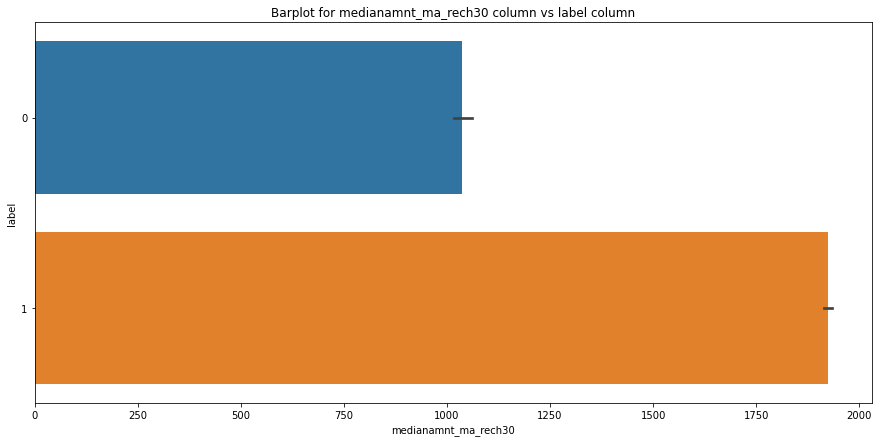

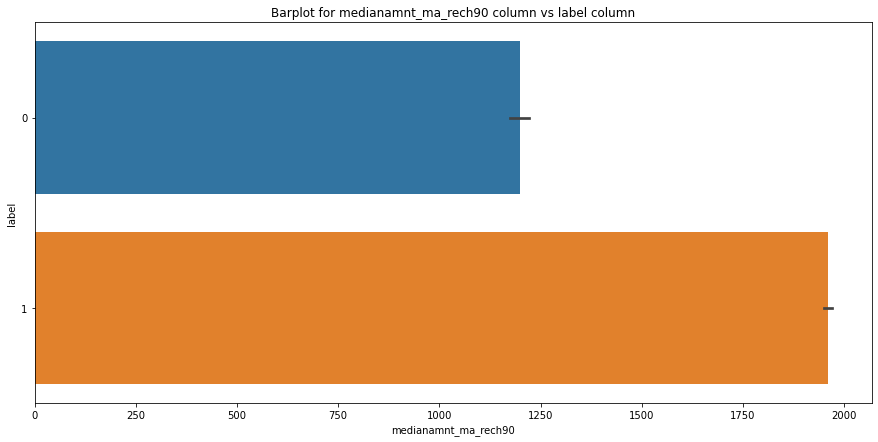

In [24]:
y = 'label'

x = 'medianamnt_ma_rech30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'medianamnt_ma_rech90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The users who have done their median amount of recharge of around 2000 in main account over last 30 days have successfully paid their credit amount within 5 days of issuing loan while the users who have done amount recharge of around 1000 have failed to pay back the loan within due date.

Similar to 30 days data, here also the users who have done their median amount recharge of 1950 in their main account over last 90 days they have paid back their credit amount within 5 days while the users having their median amount around 1200 have not paid the loan within 5 days

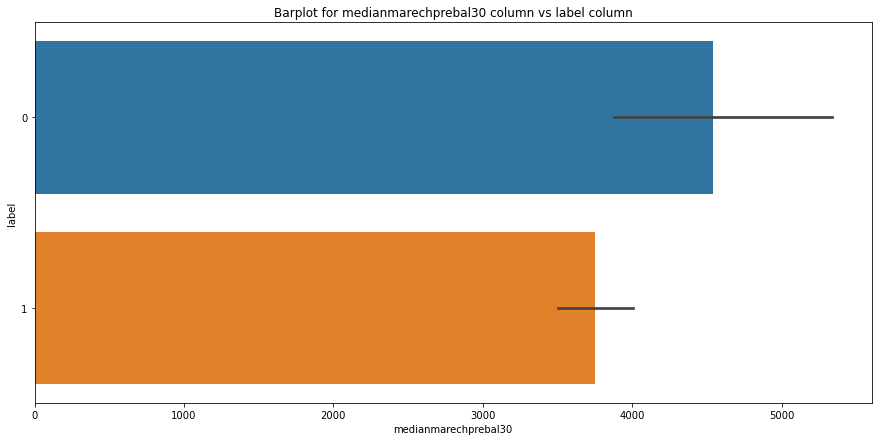

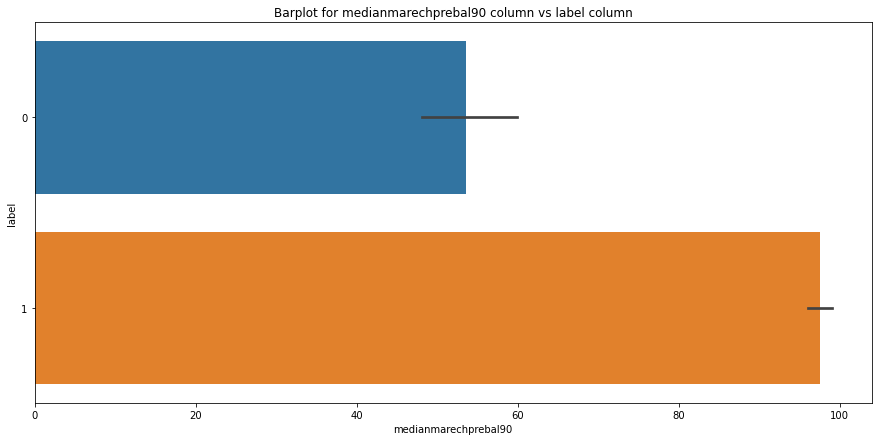

In [25]:
y = 'label'

x = 'medianmarechprebal30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'medianmarechprebal90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

In 30 days data, the median of main account balance for defaulters are around 4500 (Indonesian Rupiah) which is high compared to non-defaulters. Which means increasing median of main account balance just before recharge in last 30 days at user level, increasing the probability to being defaulter.

In last 90 days data, the median of main account balance for non-defaulters are around 100 (Indonesian Rupiah) which is high compared to defaulters. Which means increasing median of main account balance just before recharge in last 90 days at user level, increasing the probability of being non-defaulters.

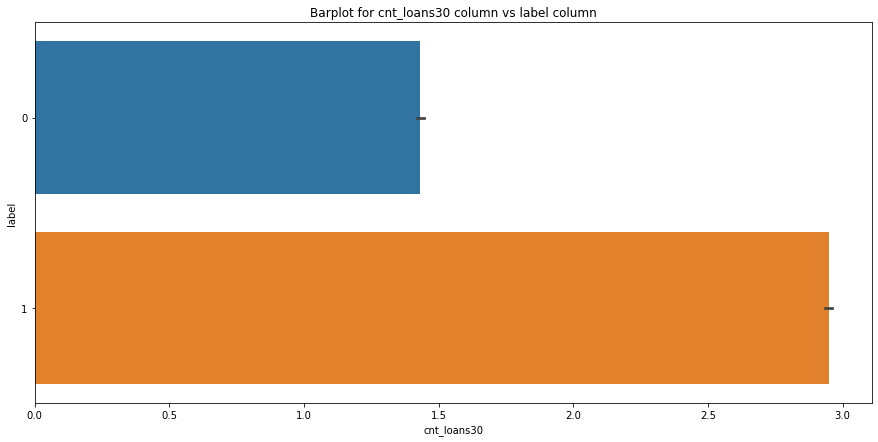

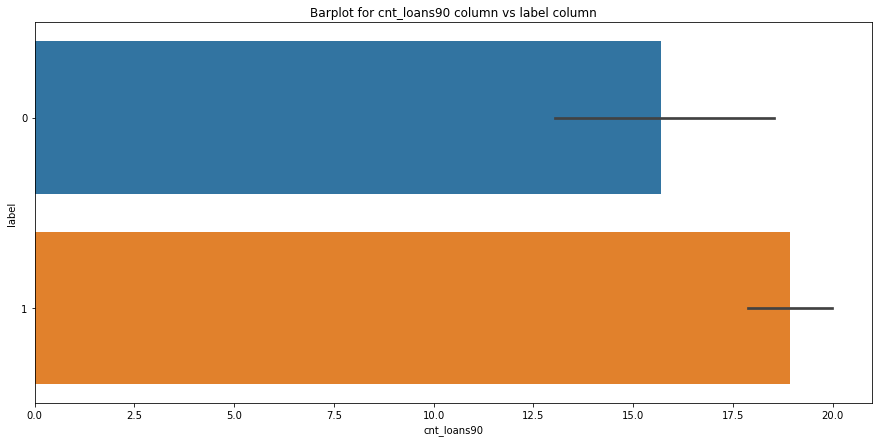

In [26]:
y = 'label'

x = 'cnt_loans30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'cnt_loans90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

Defaulters have taken 1 loan in last 30 days that is when a person takes loan amount for 1 time in last 30 days the chances of not paying back the credit amount are higher. And the users who have paid back the loan, they have taken maximum number of 3 loans in last 30 days data.

In 90 days data, the number of loans taken by the defaulters are highly increasing also increasing the probability to being defaulter. Also, the number of loans taken by non-defaulters being decreased in last 90 days when compared to 30 days data.

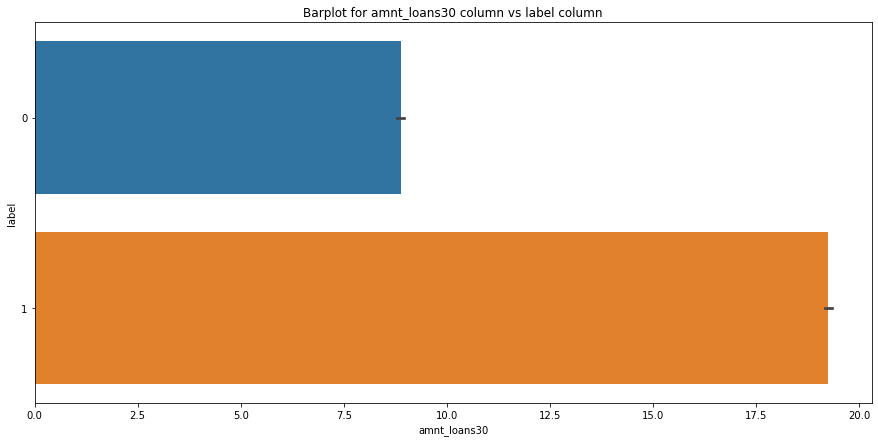

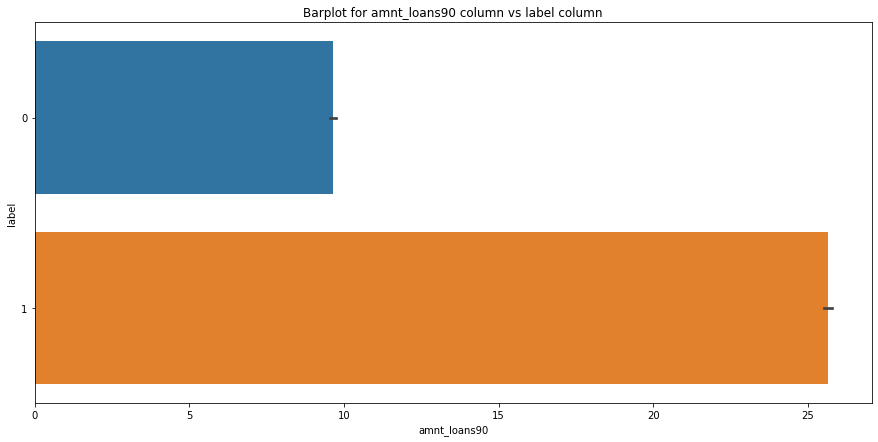

In [27]:
y = 'label'

x = 'amnt_loans30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'amnt_loans90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The total amount of loans taken by the defaulters in last 30 days are in the range of 7.5-10 while the non-defaulters have taken around 20 loans in last 30 days.

The total amount of loans taken by the defaulters in last 90 days are upto 10 and the non- defaulters have taken total amount of loans around 26 in last 90 days.

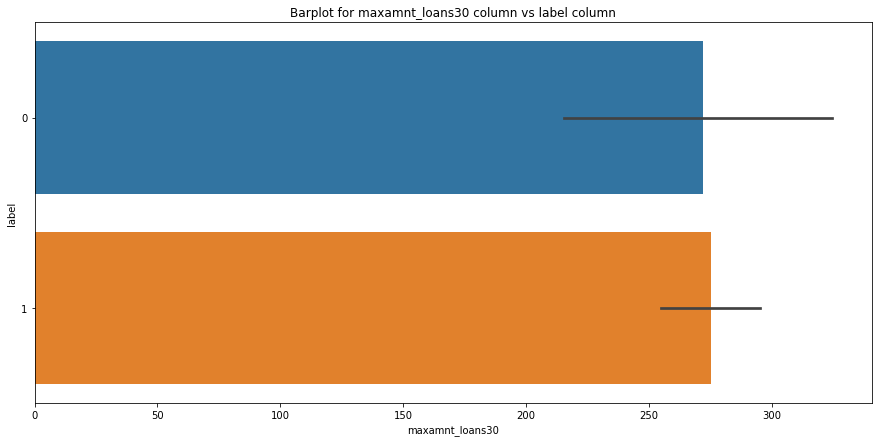

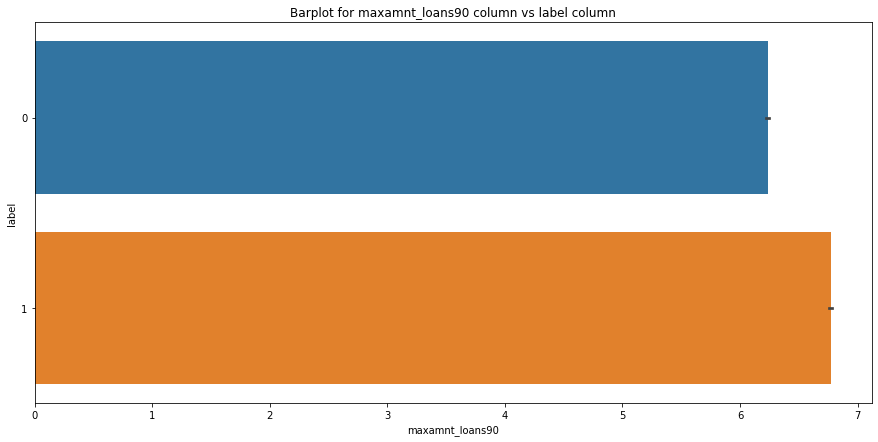

In [28]:
y = 'label'

x = 'maxamnt_loans30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'maxamnt_loans90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The maximum amount of loan taken by the user in last 30 days and 90 days are almost same. The maximum amount of loan taken by the defaulters and non-defaulters are upto 6 and 7 respectively in last 30 and 90 days.

So from the plot we can say that whenever the user takes the maximum loan amount of 6, then only some users may not pay back the loan amount.

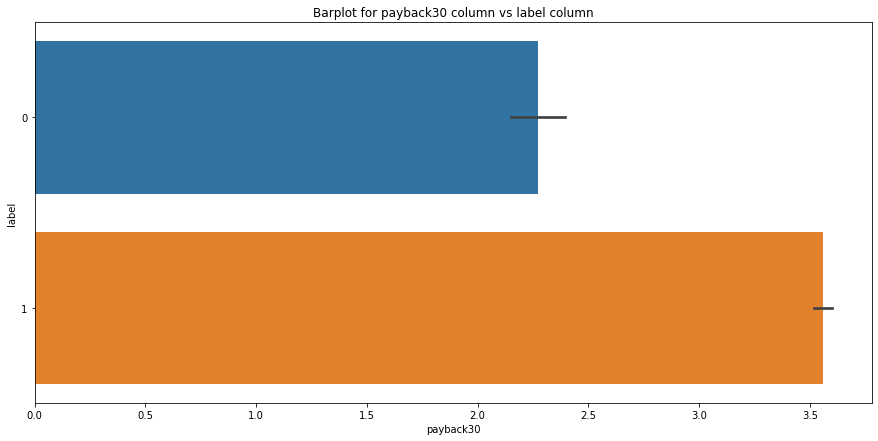

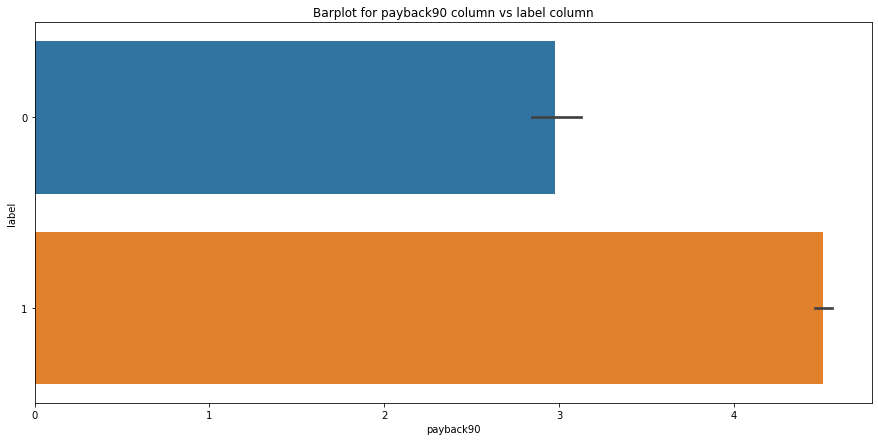

In [29]:
y = 'label'

x = 'payback30'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'payback90'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

The defaulters are paying back their loan in an average of 2-2.5 days and the non-defaulters are paying back their loan in an average of 3 days over last 30 days.

The defaulters in last 90 days, are paying back their loan in an average of 3 days and non-defaulters are paying back their loan in 4-5 days over last 90 days.

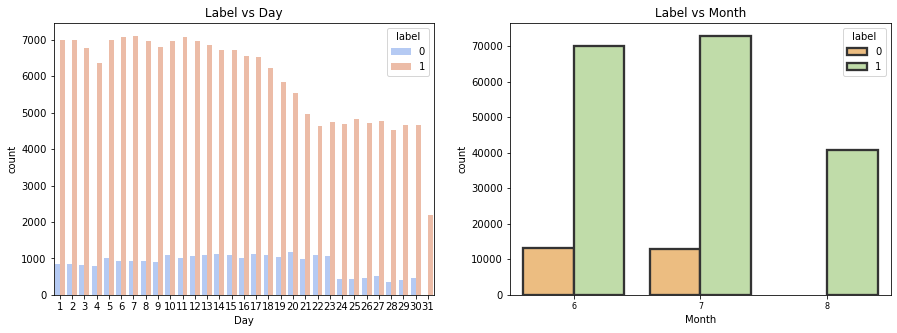

In [32]:
plt.figure(figsize=(15,5))

# Comparing label vs Day
plt.subplot(1,2,1)
sns.countplot(x=df['Day'],hue=df["label"],linewidth=2.3,palette="coolwarm")
plt.title('Label vs Day')

# Comparing label vs Average payback time in days over last 90 days
plt.subplot(1,2,2)
sns.countplot(x=df['Month'],hue=df['label'],linewidth=2.3, edgecolor=".2",palette="Spectral")
plt.title('Label vs Month')
plt.xticks(fontsize='8')
plt.show()

The users who have taken loans in the month of august, they seem paying back their loan within 5 days.

##### Multivariate Analysis

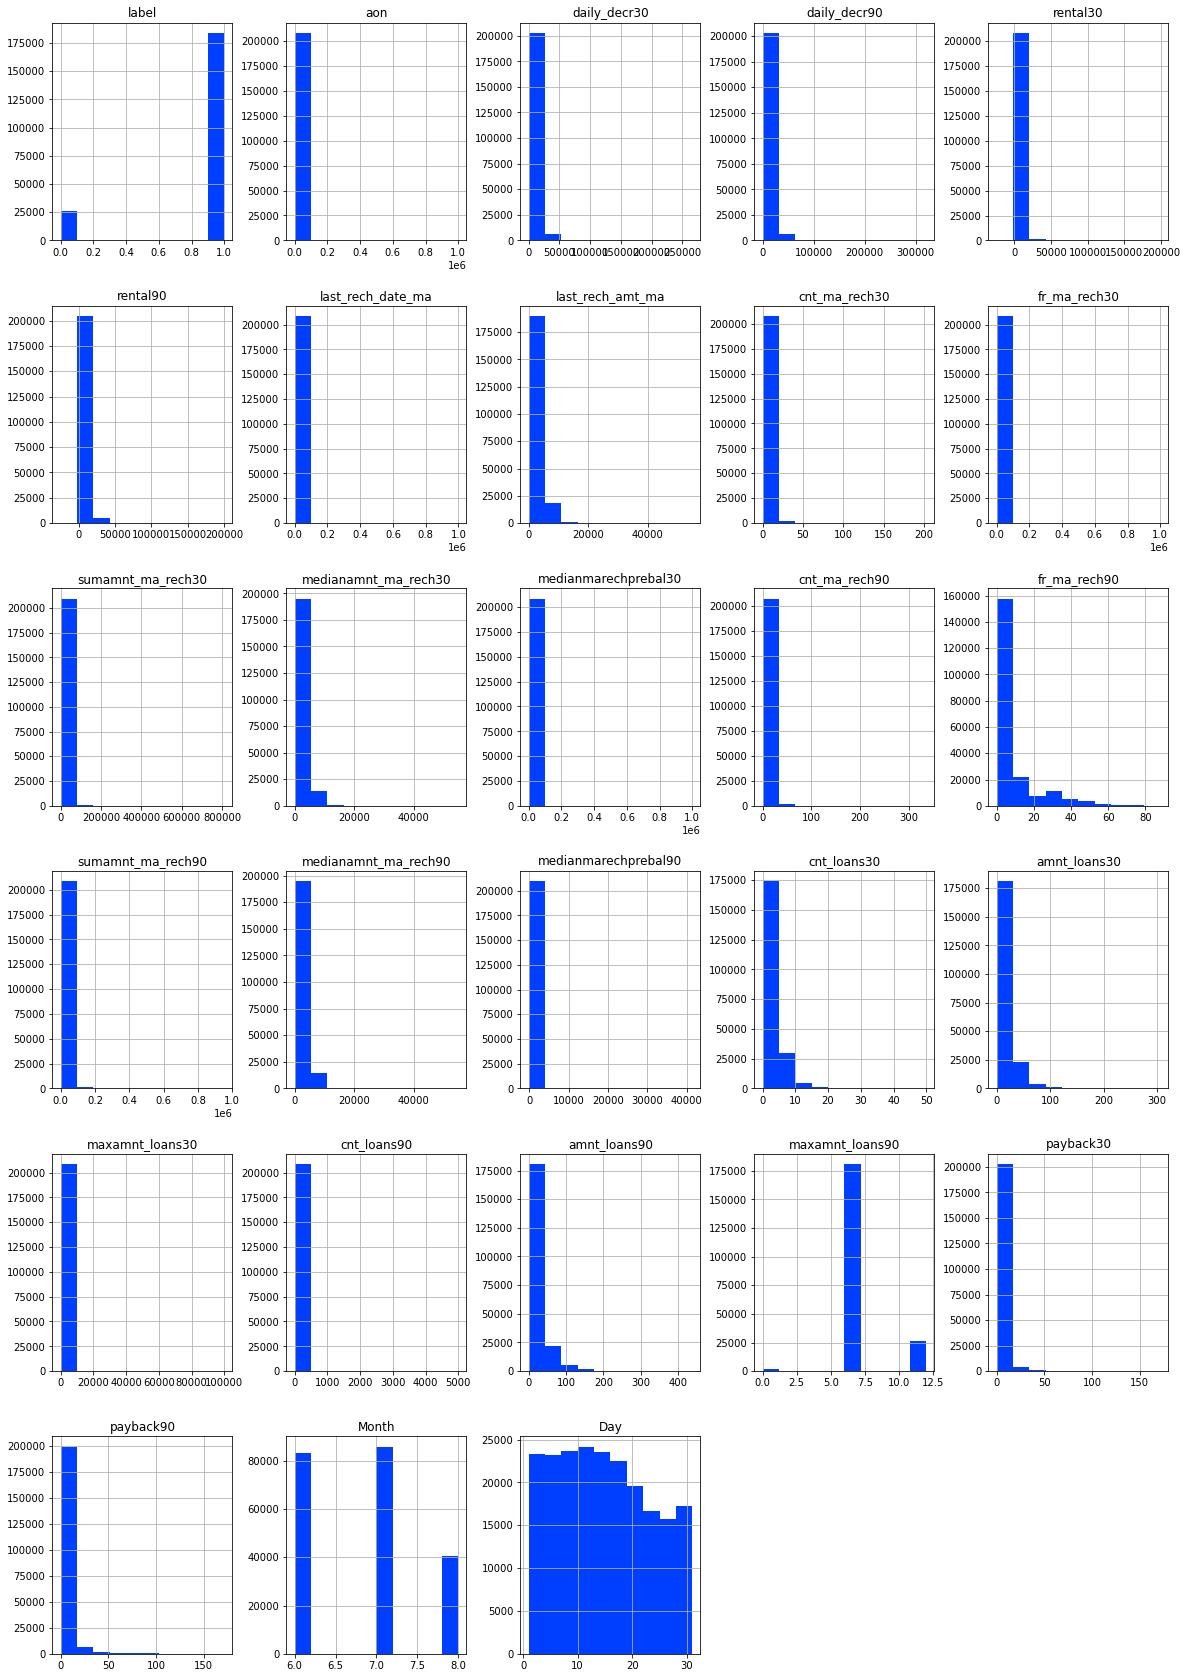

In [33]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,30))
plt.show()

### Outliers

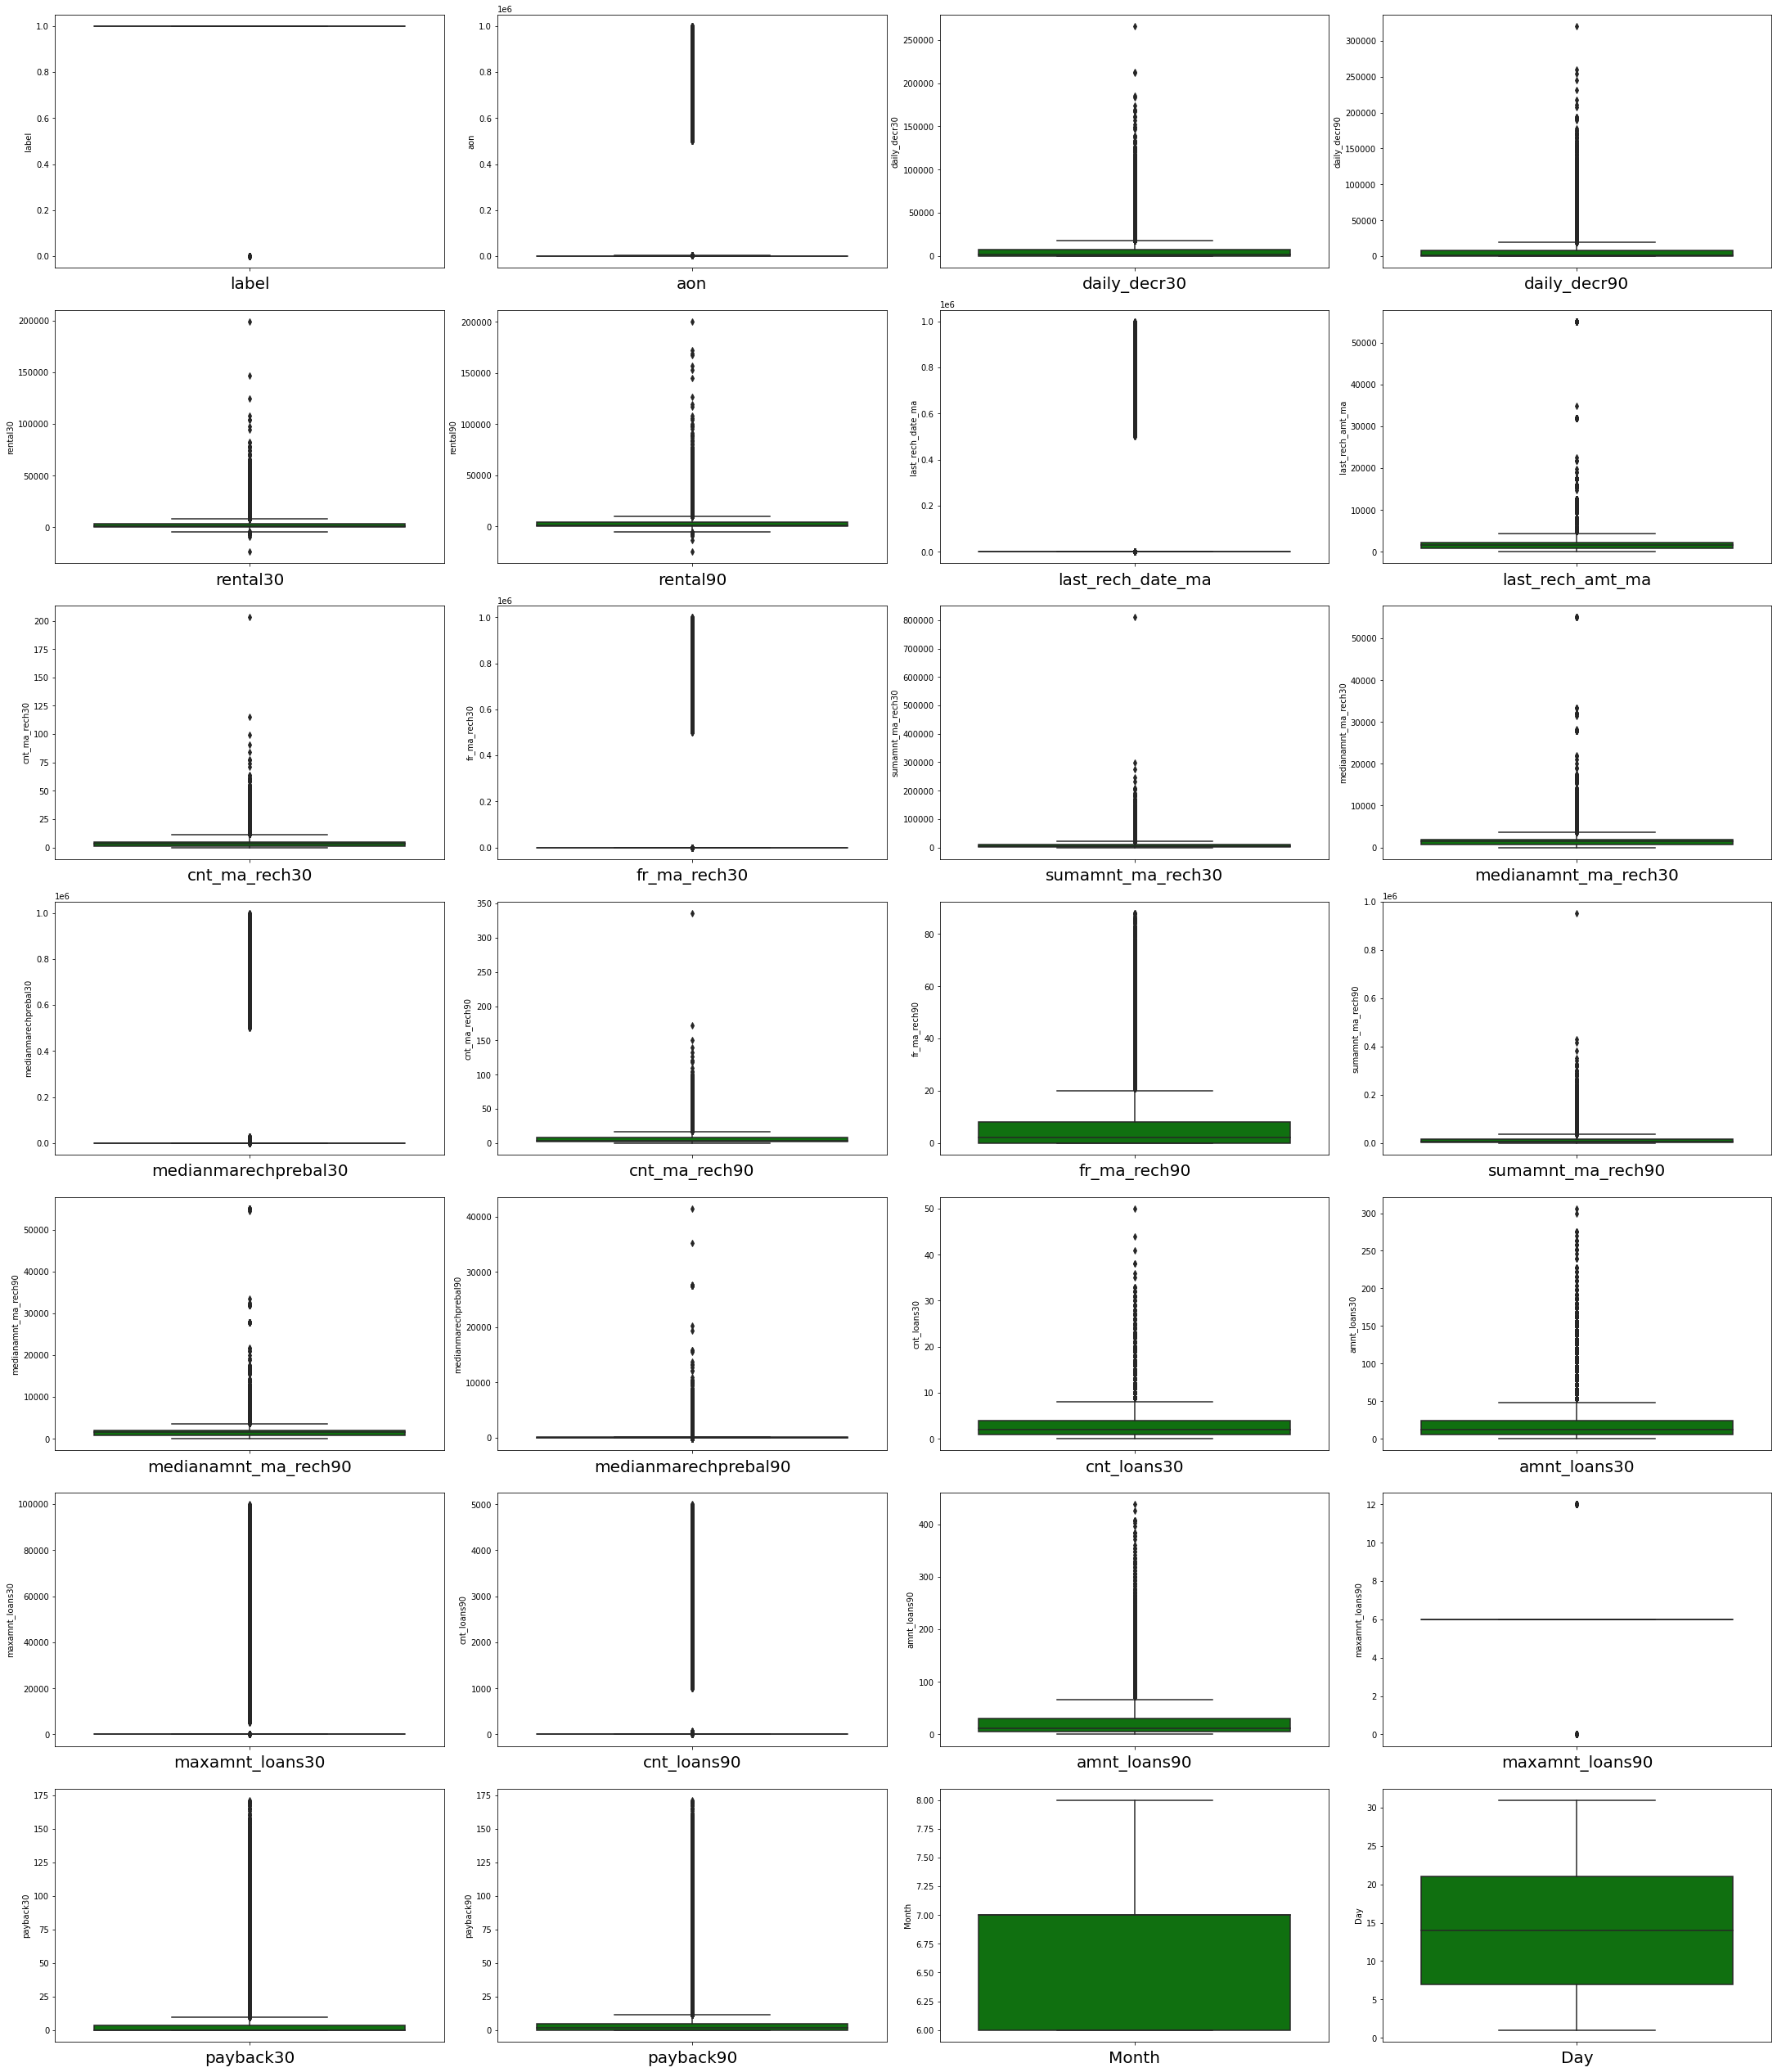

In [34]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=28:
        ax = plt.subplot(7,4,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

Fom above, we can see Outliers present in all column except Month and Day. We will ignore for label as this is our target variable.Let's remove Outliers

##### Removing outliers using Zscore

In [37]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'Month',
       'Day'],
      dtype='object')

In [9]:
# Features containing outliers
df1= df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]


In [11]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df1=df[(z<3).all(axis=1)]


In [40]:
# Checking the shape of dataset before and after removing outliers
print("Shape of train dataset before removing outliers:", df.shape)
print("Shape of train dataset after removing outliers:", new_df1.shape)

Shape of train dataset before removing outliers: (209593, 28)
Shape of train dataset after removing outliers: (171224, 28)


In [41]:
# Let's check the the data loss
data_loss = (209593-171224)/209593*100
data_loss

18.306431989617973

Data loss is quite high-18%, we will check IQR method

##### IQR (Inter Quantile Range) method

In [12]:
# 1st quantile
Q1=df1.quantile(0.25)

# 3rd quantile
Q3=df1.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
print("Shape of train data after using IQR method:", new_df1.shape)

Shape of train data after using IQR method: (77450, 28)


In [45]:
# Let's check the the data loss
data_loss = (209593-77450)/209593*100
data_loss

63.04743001913232

63% data loss we cannot consider.We will use percentile method of 2%

##### Percentile Method

In [10]:
#Removing outliers using percentile method in train dataset
for col in df1:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]

I have removed the outliers present in dataset using percentile method.

### Skewness

In [47]:
# Checking the skewness
df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974394
daily_decr90            2.091659
rental30                2.106223
rental90                2.194864
last_rech_date_ma       2.615836
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       1.750999
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.830858
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.666638
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         1.405285
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
Month                   0.343242
Day                     0.199845
dtype: float64

Here we can observe the skewness present in all the columns except Day and Month. Since label is our target variable no need to remove skewness in this column as well. Lets remove the columns having skewness more than +0.5 & -0.5 using power transformation method(yeo-johnson method).

##### Removing skewness through yeo-johnson

In [11]:
# Removing skewness using yeo-johnson  method to get better prediction
skew= ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [12]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.192082,...,0.147199,-0.830131,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381291,1.785799,1.821484
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.221233,...,1.751936,0.380302,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,2.622597,-0.938528,-1.019522
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.559381,...,0.147199,0.438673,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-0.381291,-0.938528,-1.019522
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.899447,...,-0.264481,-1.258848,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381291,-0.938528,-1.019522
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.323060,...,0.808981,0.010082,1.608532,1.499492,-0.269609,1.235280,1.166897,-0.381291,0.640306,0.428035


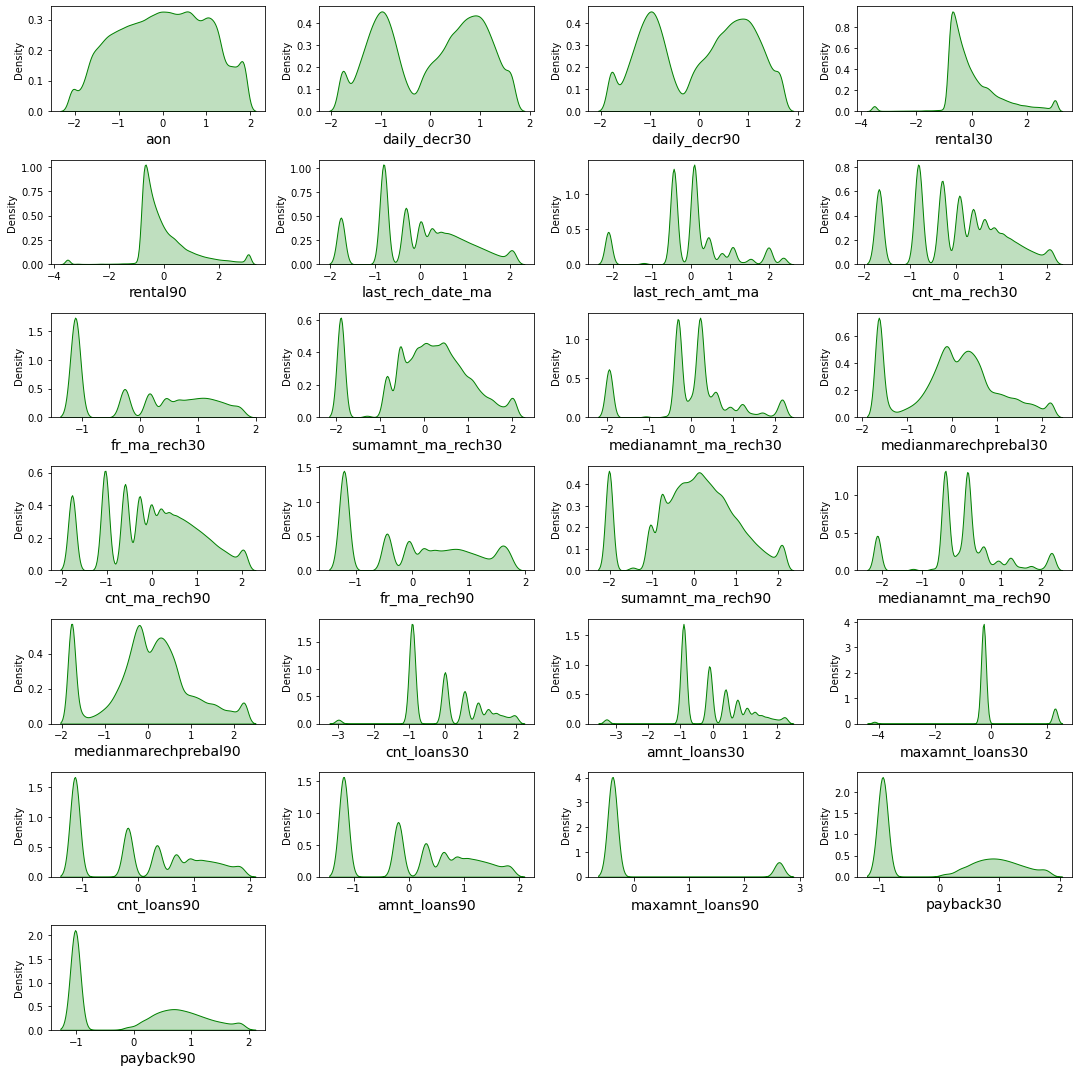

In [50]:
# Checking how the data has been distriubted in each column after removing skewness

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in df[skew] :
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[column],color="g",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Correlation

In [51]:
# Checking the correlation between features and the target
cor = df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
label,1.000000,0.096267,0.268455,0.270945,0.066605,0.081689,0.058272,0.261558,0.344106,0.241559,0.358799,0.277643,0.269533,0.361987,0.220134,0.368684,0.252438,0.262035,0.234579,0.233895,0.059609,0.287740,0.302689,0.099686,0.232627,0.240341,0.154949,0.006825
aon,0.096267,1.000000,0.115565,0.116171,0.065666,0.069954,0.061616,0.097955,0.037108,0.069588,0.080562,0.097277,0.048377,0.058066,0.075321,0.097926,0.103318,0.048224,0.073933,0.074585,0.029566,0.116080,0.118641,0.038817,0.081135,0.111311,0.086131,0.016448
daily_decr30,0.268455,0.115565,1.000000,0.998325,0.494678,0.526270,0.148934,0.377080,0.496257,0.296518,0.555359,0.389905,0.275967,0.627742,0.220470,0.664625,0.367119,0.245849,0.342079,0.395197,0.293124,0.518137,0.571491,0.403146,0.329155,0.404538,0.816674,-0.010334
daily_decr90,0.270945,0.116171,0.998325,1.000000,0.496415,0.532961,0.152948,0.376713,0.491706,0.295594,0.550046,0.386779,0.274673,0.631336,0.221557,0.667722,0.367461,0.246694,0.335471,0.389223,0.291657,0.519245,0.572916,0.406075,0.326476,0.405166,0.829922,-0.017450
rental30,0.066605,0.065666,0.494678,0.496415,1.000000,0.967176,0.022954,0.139661,0.296901,0.130438,0.295151,0.150491,0.110995,0.369335,0.066839,0.355237,0.126004,0.085518,0.201431,0.242680,0.205732,0.306644,0.338342,0.280068,0.205562,0.241874,0.426212,0.044952
rental90,0.081689,0.069954,0.526270,0.532961,0.967176,1.000000,0.036522,0.138654,0.293149,0.134780,0.288913,0.146399,0.113095,0.392809,0.072801,0.373277,0.123665,0.089759,0.189805,0.235286,0.213534,0.322256,0.356440,0.302694,0.204253,0.254670,0.492671,0.020795
last_rech_date_ma,0.058272,0.061616,0.148934,0.152948,0.022954,0.036522,1.000000,0.510546,-0.014156,0.055211,0.116886,0.316212,0.176969,0.104960,0.212568,0.254840,0.499794,0.322063,-0.093427,-0.094328,-0.021010,-0.015794,-0.010093,0.021623,-0.084375,-0.009833,0.098317,0.043316
last_rech_amt_ma,0.261558,0.097955,0.377080,0.376713,0.139661,0.138654,0.510546,1.000000,0.321219,0.271814,0.652559,0.811083,0.421977,0.373169,0.336927,0.701542,0.902139,0.484013,0.144867,0.164279,0.130890,0.211549,0.240275,0.183079,0.143458,0.180046,0.154444,0.057765
cnt_ma_rech30,0.344106,0.037108,0.496257,0.491706,0.296901,0.293149,-0.014156,0.321219,1.000000,0.418862,0.857121,0.415131,0.481250,0.920818,0.220237,0.778120,0.286052,0.386457,0.700620,0.697461,0.183510,0.706690,0.719248,0.195099,0.546511,0.488965,0.192337,0.097636
fr_ma_rech30,0.241559,0.069588,0.296518,0.295594,0.130438,0.134780,0.055211,0.271814,0.418862,1.000000,0.460805,0.381173,0.303054,0.410987,0.613784,0.421736,0.291046,0.223030,0.298338,0.283388,0.093838,0.350050,0.361689,0.102132,0.413674,0.392590,0.131977,0.080686


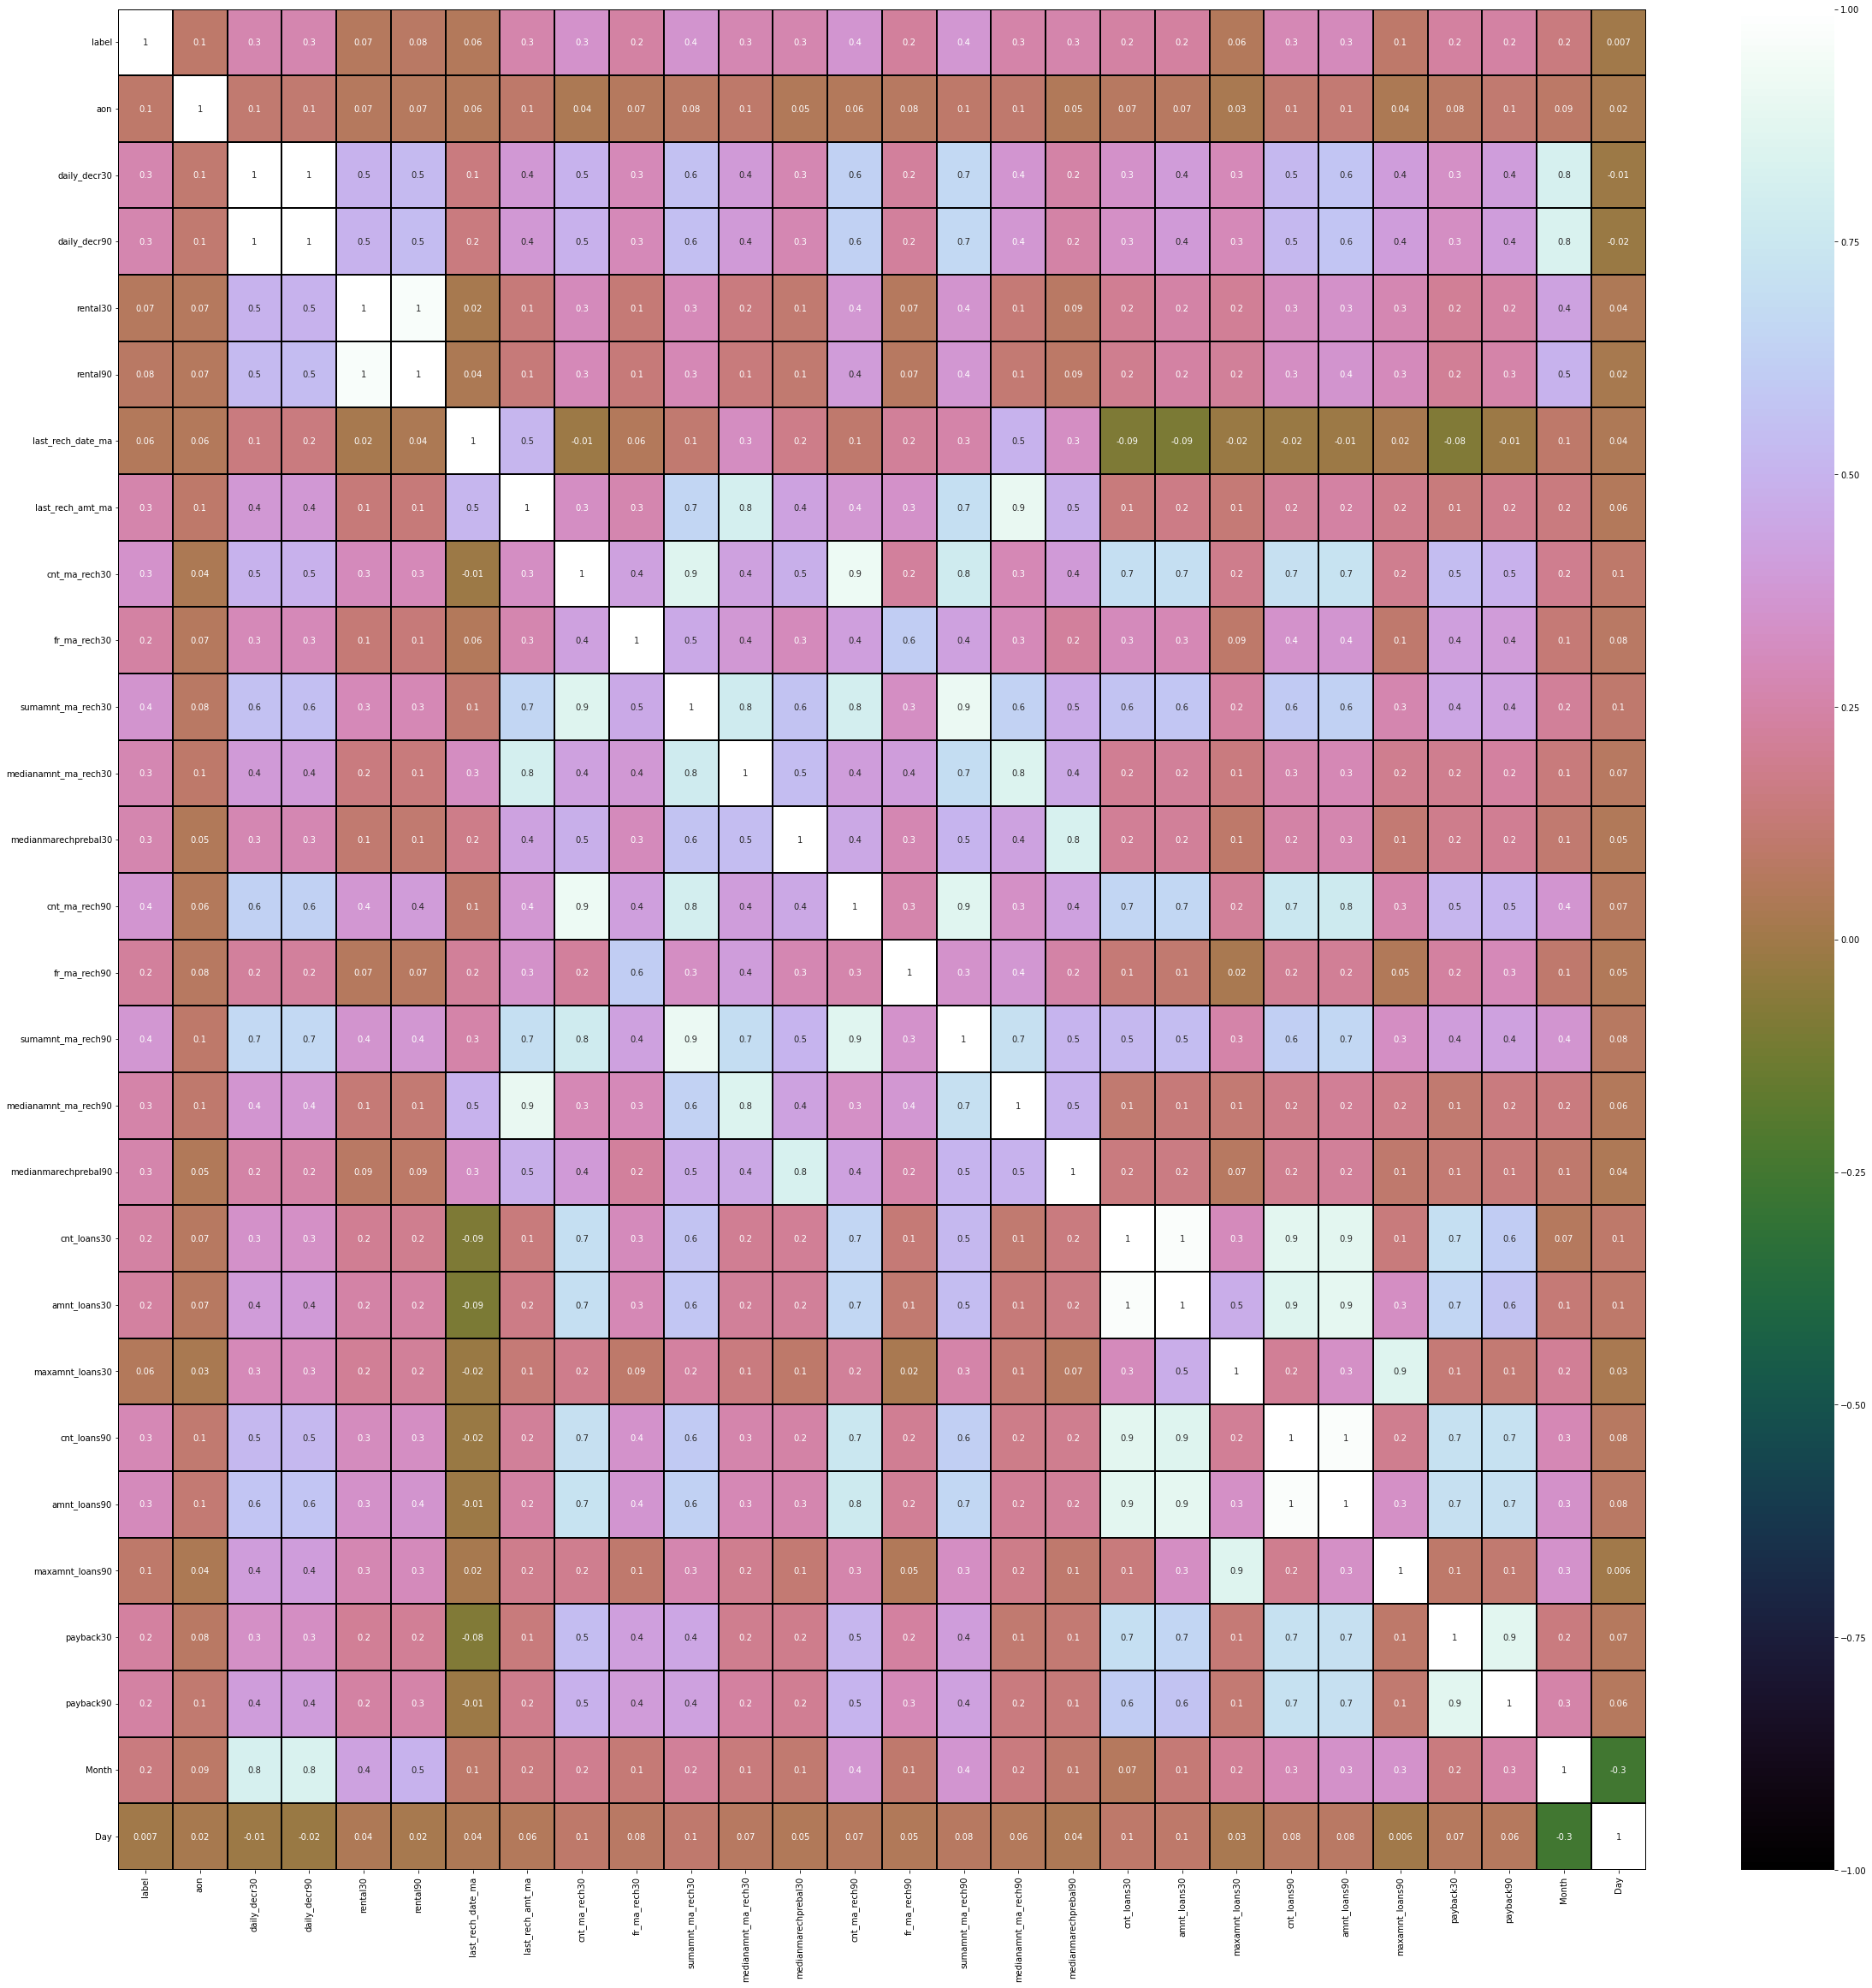

In [52]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(40,40))    
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="cubehelix")
plt.yticks(rotation=0);

From above, we can see lots of feature are highly correlated with each other. There is no negative correlation.

In [53]:
cor['label'].sort_values(ascending=False)

label                   1.000000
sumamnt_ma_rech90       0.368684
cnt_ma_rech90           0.361987
sumamnt_ma_rech30       0.358799
cnt_ma_rech30           0.344106
amnt_loans90            0.302689
cnt_loans90             0.287740
medianamnt_ma_rech30    0.277643
daily_decr90            0.270945
medianmarechprebal30    0.269533
daily_decr30            0.268455
medianmarechprebal90    0.262035
last_rech_amt_ma        0.261558
medianamnt_ma_rech90    0.252438
fr_ma_rech30            0.241559
payback90               0.240341
cnt_loans30             0.234579
amnt_loans30            0.233895
payback30               0.232627
fr_ma_rech90            0.220134
Month                   0.154949
maxamnt_loans90         0.099686
aon                     0.096267
rental90                0.081689
rental30                0.066605
maxamnt_loans30         0.059609
last_rech_date_ma       0.058272
Day                     0.006825
Name: label, dtype: float64

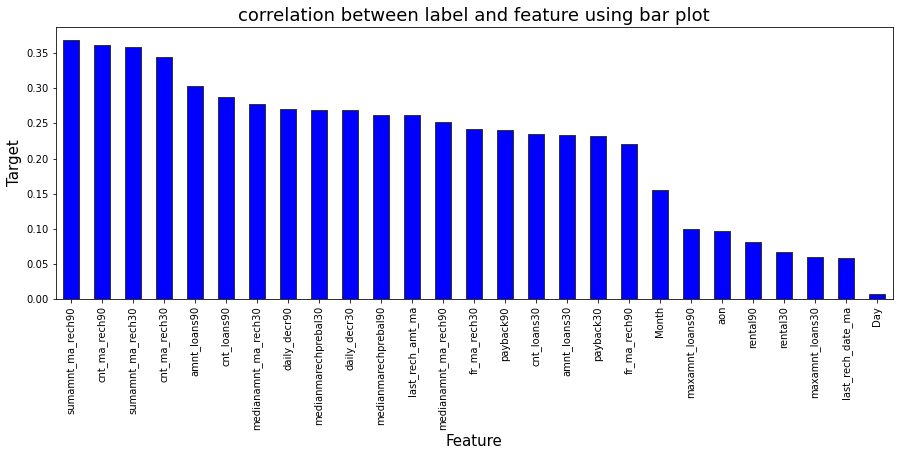

In [54]:
plt.figure(figsize=(15,5))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='b',edgecolor=".2")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the bar plot we can clearly observe the positive correlation between the label and features. Here the column Day is less correlated with the label compared to others, we can drop these columns if necessary but for now let's keep it as it is.

#### Separating the independent and target variables into x and y

In [13]:
x = df.drop("label", axis=1)
y = df["label"]

##### Scaling data with standard scaler

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Month,Day
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.192082,...,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381303,1.785799,1.821484,0.273360,0.663721
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.221233,...,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,2.622586,-0.938528,-1.019522,1.622099,-0.521271
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.559381,...,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-0.381303,-0.938528,-1.019522,1.622099,0.545222
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.899447,...,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-0.381303,-0.938528,-1.019522,-1.075378,-0.995267
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.323060,...,1.608532,1.499492,-0.269609,1.235280,1.166897,-0.381303,0.640306,0.428035,-1.075378,0.900719


In [57]:
y.value_counts()

1    183431
0     26162
Name: label, dtype: int64

Since we have class imbalancing issue in our dataset, let's use oversampling method to balance the data.

#### Oversampling

In [15]:
# Oversampling the data by adding samples to make all the categorical quality values same
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [20]:
y.value_counts()

0    183431
1    183431
Name: label, dtype: int64

Now our target variable is balanced.We can now proceede fo Modelling

## Modeling

#### Finding best random state for building Classification Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [17]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9166901389254855  on Random_state  23


Here we are getting accuracy score of 91.66% with Random state 23

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

#### Feature Importance

In [24]:
# Lets chkeck the feature importance using Random Forest Regressor

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(RFC.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances

,Importance
Features,
cnt_ma_rech90,0.079
Day,0.077
sumamnt_ma_rech90,0.076
daily_decr90,0.070
Month,0.069
sumamnt_ma_rech30,0.065
cnt_ma_rech30,0.064
daily_decr30,0.061
amnt_loans90,0.050


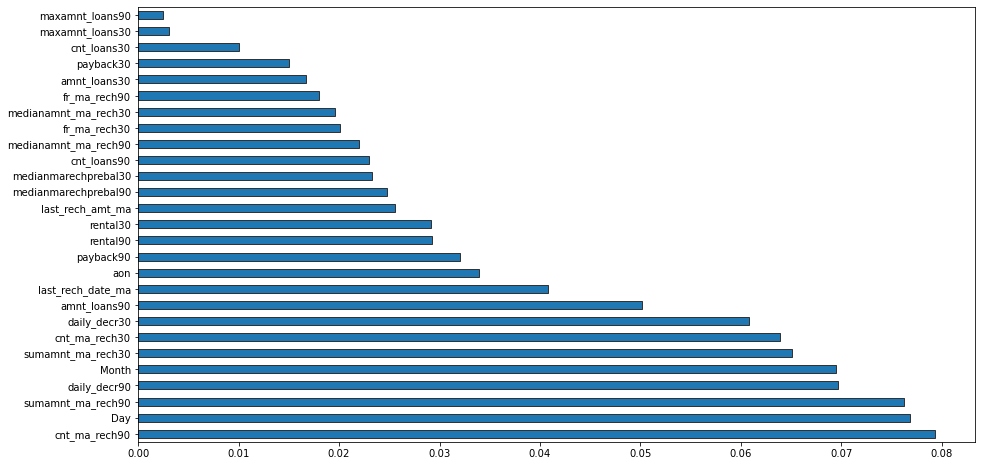

In [25]:
plt.figure(figsize=(15,8))
importances=pd.Series(RFC.feature_importances_,index=x.columns)
importances.nlargest(30).plot(kind='barh',color="tab:blue",edgecolor=".2")
plt.show()

Here with the help of RandomForestClassifier we are able to list down the importance or priority given to a column as per it's involvement or weightage in predicting our label. Here we can clearly observe the features which are important for the predictions. The columns cnt_ma_rech90 column contributing more for the predictions.

### Decision Tree Classifier

In [19]:
# Checking Accuracy and evaluation metrics for Decision Tree Classifier
DTC = DecisionTreeClassifier()

# Training the model
DTC.fit(x_train,y_train)

#Predicting y_test
predDTC = DTC.predict(x_test)

# Accuracy Score
DTC_score = accuracy_score(y_test, predDTC)*100
print("Accuracy Score:", DTC_score)

# ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test,predDTC)*100      
print("\nroc_auc_score:", roc_auc_score)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predDTC)
print("\nConfusion Matrix:\n",conf_matrix)

# Classification Report
class_report = classification_report(y_test,predDTC)
print("\nClassification Report:\n", class_report)

# Cross Validation Score
cv_score = (cross_val_score(DTC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

# Result of accuracy minus cv scores
Result = DTC_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 91.58087934653231

roc_auc_score: 91.58206097674332

Confusion Matrix:
 [[50623  4297]
 [ 4969 50170]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     54920
           1       0.92      0.91      0.92     55139

    accuracy                           0.92    110059
   macro avg       0.92      0.92      0.92    110059
weighted avg       0.92      0.92      0.92    110059

Cross Validation Score: 90.94974575607687

Accuracy Score - Cross Validation Score is 0.6311335904554483


### Random Forest Classifier

In [20]:
# Checking Accuracy and evaluation metrics for Random Forest Classifier
RFC = RandomForestClassifier()

RFC.fit(x_train,y_train)                            
predRFC = RFC.predict(x_test)                       

RFC_score = accuracy_score(y_test, predRFC)*100     
print("Accuracy Score:", RFC_score)  

from sklearn.metrics import roc_auc_score           
roc_auc_score2 = roc_auc_score(y_test,predRFC)*100      
print("\nroc_auc_score:", roc_auc_score2)

conf_matrix = confusion_matrix(y_test, predRFC)     
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predRFC) 
print("\nClassification Report:\n", class_report)

cv_score2 = (cross_val_score(RFC, x, y, cv=5).mean())*100  
print("Cross Validation Score:", cv_score2)

# Result of accuracy minus cv scores
Result = RFC_score - cv_score2
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 95.31342280049792

roc_auc_score: 95.31468429710587

Confusion Matrix:
 [[52695  2225]
 [ 2933 52206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     54920
           1       0.96      0.95      0.95     55139

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059

Cross Validation Score: 95.03057026354098

Accuracy Score - Cross Validation Score is 0.2828525369569377


### ExtraTrees Classifier

In [21]:
# Checking Accuracy and evaluation metrics for ExtraTrees Classifier
XT = ExtraTreesClassifier()

XT.fit(x_train,y_train)                            
predXT = XT.predict(x_test)                       

XT_score = accuracy_score(y_test, predXT)*100      
print("Accuracy Score:", XT_score)  

roc_auc_score3 = roc_auc_score(y_test,predXT)*100     
print("\nroc_auc_score:", roc_auc_score3)

conf_matrix = confusion_matrix(y_test, predXT)     
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predXT) 
print("\nClassification Report:\n", class_report)

cv_score3 = (cross_val_score(XT, x, y, cv=5).mean())*100 
print("Cross Validation Score:", cv_score3)

# Result of accuracy minus cv scores
Result = XT_score - cv_score3
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 95.9712517831345

roc_auc_score: 95.97426962939863

Confusion Matrix:
 [[53542  1378]
 [ 3056 52083]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     54920
           1       0.97      0.94      0.96     55139

    accuracy                           0.96    110059
   macro avg       0.96      0.96      0.96    110059
weighted avg       0.96      0.96      0.96    110059

Cross Validation Score: 96.36457531404268

Accuracy Score - Cross Validation Score is -0.3933235309081766


### Gradient Boosting Classifier

In [22]:
# Checking Accuracy and evaluation metrics for GradientBoosting Classifier
GB = GradientBoostingClassifier()

GB.fit(x_train,y_train)                           
predGB = GB.predict(x_test)                       

GB_score = accuracy_score(y_test, predGB)*100     
print("Accuracy Score:", GB_score)  

roc_auc_score4 = roc_auc_score(y_test,predGB)*100     
print("\nroc_auc_score:", roc_auc_score4)

conf_matrix = confusion_matrix(y_test, predGB)     
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predGB) 
print("\nClassification Report:\n", class_report)

cv_score4 = (cross_val_score(GB, x, y, cv=5).mean())*100  
print("Cross Validation Score:", cv_score4)

# Result of accuracy minus cv scores
Result = GB_score - cv_score4
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 89.91450040432859

roc_auc_score: 89.91752681269122

Confusion Matrix:
 [[50218  4702]
 [ 6398 48741]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     54920
           1       0.91      0.88      0.90     55139

    accuracy                           0.90    110059
   macro avg       0.90      0.90      0.90    110059
weighted avg       0.90      0.90      0.90    110059

Cross Validation Score: 89.67324027909426

Accuracy Score - Cross Validation Score is 0.2412601252343336


### Bagging Classifier

In [23]:
# Checking Accuracy and evaluation metrics for Bagging Classifier
BC = BaggingClassifier()

BC.fit(x_train,y_train)                           
predBC = BC.predict(x_test)                       

BC_score = accuracy_score(y_test, predBC)*100     
print("Accuracy Score:", BC_score)  

roc_auc_score5 = roc_auc_score(y_test,predBC)*100     
print("\nroc_auc_score:", roc_auc_score5)

conf_matrix = confusion_matrix(y_test, predBC)     
print("\nConfusion Matrix:\n",conf_matrix)

class_report = classification_report(y_test,predBC) 
print("\nClassification Report:\n", class_report)

cv_score5 = (cross_val_score(BC, x, y, cv=5).mean())*100 
print("Cross Validation Score:", cv_score5)

# Result of accuracy minus cv scores
Result = BC_score - cv_score5
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 94.14586721667469

roc_auc_score: 94.14872415666916

Confusion Matrix:
 [[52495  2425]
 [ 4018 51121]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     54920
           1       0.95      0.93      0.94     55139

    accuracy                           0.94    110059
   macro avg       0.94      0.94      0.94    110059
weighted avg       0.94      0.94      0.94    110059

Cross Validation Score: 93.71127315965356

Accuracy Score - Cross Validation Score is 0.43459405702112974


### Extreme Gradient Boosting(XGB) Classifier

In [24]:
# Checking Accuracy and evaluation metrics for XGB Classifier
XGB = xgb(verbosity=0)

XGB.fit(x_train,y_train)                            
predXGB = XGB.predict(x_test)                       

XGB_score = accuracy_score(y_test, predXGB)*100      
print("Accuracy Score:", XGB_score)  

roc_auc_score6 = roc_auc_score(y_test,predXGB)*100      
print("\nroc_auc_score:", roc_auc_score6)

conf_matrix = confusion_matrix(y_test, predXGB)     
print("\nConfusion Matrix:\n",conf_matrix)
class_report = classification_report(y_test,predXGB) 
print("\nClassification Report:\n", class_report)

cv_score6 = (cross_val_score(XGB, x, y, cv=5).mean())*100  
print("Cross Validation Score:", cv_score6)

# Result of accuracy minus cv scores
Result = XGB_score - cv_score6
print("\nAccuracy Score - Cross Validation Score is", Result)

Accuracy Score: 95.06537402665843

roc_auc_score: 95.06360616703753

Confusion Matrix:
 [[51721  3199]
 [ 2232 52907]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     54920
           1       0.94      0.96      0.95     55139

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059

Cross Validation Score: 93.61234288941812

Accuracy Score - Cross Validation Score is 1.4530311372403162


#### Plotting ROC and compare AUC for all the models used

In [ ]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(GB,x_test,y_test)     
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XT, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(XGB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

From the above observation, looking at the accuracy score and the cross validation score we conclude that Gradient Boosting Classifier is our best fitting model

### Hyper Parameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
# Gradient Boosting Classifier

parameters = {'max_depth': [3,6,9],  
              'max_features':['auto', 'sqrt', 'log2'],
              'learning_rate':[0.1,0.25,0.5],
              'min_samples_leaf': [1,50,100]}

In [21]:
RCV=RandomizedSearchCV(GradientBoostingClassifier(),parameters,cv=5,n_iter =10)

In [22]:
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.25, 0.5],
                                        'max_depth': [3, 6, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 50, 100]})

In [23]:
RCV.best_params_

{'min_samples_leaf': 100,
 'max_features': 'auto',
 'max_depth': 9,
 'learning_rate': 0.25}

In [24]:
# Creating final model 
MicroCredit_model = GradientBoostingClassifier(min_samples_leaf = 100, max_features = "auto", max_depth = 9,learning_rate = 0.25)
MicroCredit_model.fit(x_train, y_train)
pred = MicroCredit_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score for the Best Model is:", acc_score*100)

Accuracy score for the Best Model is: 95.20348176886942


After Hyperparameter Tuning using best parameters, accuracy score increased to 95.20%

### Plotting ROC-AUC curve

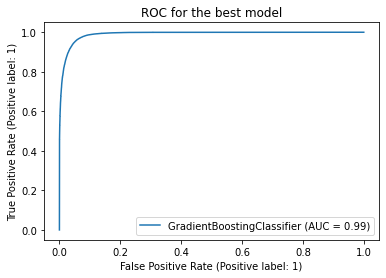

In [26]:
# Let's check the Auc for the best model after hyper parameter tuning
from sklearn.metrics import plot_roc_curve 

plot_roc_curve(MicroCredit_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

Here I have generated the ROC Curve for final model and it shows the AUC score for my final model 99%

### Confusion Matrix

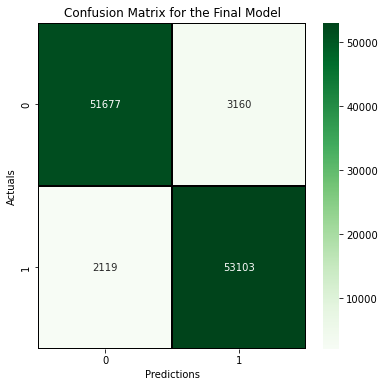

In [27]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title('Confusion Matrix for the Final Model')
plt.show()

From above confusion matrix we can able to see actual and predicted values for the final model. Also we can understand the number of times we got the correct outputs and the number of times my model missed to provide the correct prediction

## Saving The Model

In [28]:
# Saving the model using .pkl
import joblib
joblib.dump(MicroCredit_model,"Micro_Credit_Defaulter.pkl")

['Micro_Credit_Defaulter.pkl']

#### Predicting the saved model

In [29]:
# Loading the saved model
model=joblib.load("Micro_Credit_Defaulter.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
# Creating dataframe for predicted results
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,110049,110050,110051,110052,110053,110054,110055,110056,110057,110058
Predicted,0,1,0,1,1,1,1,1,1,1,...,1,0,1,0,1,0,1,1,1,1
Original,0,1,0,1,1,1,1,0,1,1,...,1,0,1,0,1,0,1,1,1,1


Now I am loading the previously saved final model to test the score on our testing dataset. From the predictions we can notice both actual values and predicted values are almost same.

## Conclusion

•	From this dataset we were able to understand that the selection of customers for the credit to know whether they are defaulters or non-defaulters are done based on different features.

•	First, we loaded the dataset and have done data cleaning and EDA process and pre-processing techniques like checking outliers, skewness, correlation, scaling data etc and got better insights from data visualization.

•	Then we did the model training, building the model and finding out the best model based on different metrices like Accuracy Score, Cross Validation Score, roc_auc_score, precision, recall, f1score etc. We tried ensemble techniques like Random Forest Classifier, Extra Trees Classifier, GradientBoosting Classifier, Bagging Classifier etc and some other models like Decision Tree Classifier & XGB Classifier.

•	We got GradientBoosting Classifier as the best model among all the models as it gave least difference of accuracy and cross validation score. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The accuracy score increased after tuning. So, we concluded that GradientBoosting Classifier as the best algorithm as it was giving high accuracy and AUC after tuning.

•	After that we saved the model in a pickle with a filename to use whenever we require. Then we loaded the saved file and predicted the values.

•	Overall, we can say that this dataset is good for predicting the defaulters level using classification analysis and conclude that GradientBoosting Classifier is the best working algorithm model we obtained. We can improve the data by adding some more features.
